In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Ingestion

In [2]:
df = pd.read_csv("Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# KMeans Clustering

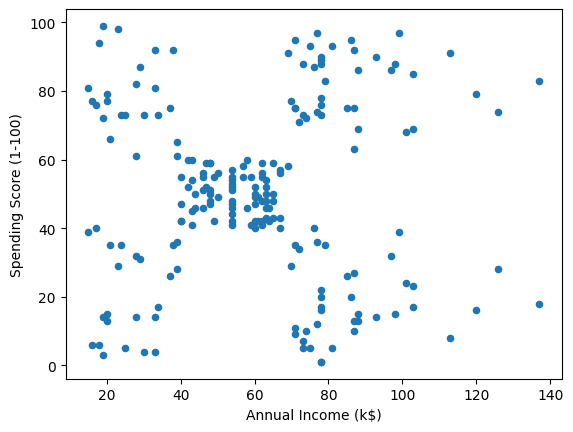

In [4]:
plt.scatter(x="Annual Income (k$)",y="Spending Score (1-100)", data = df, s=20)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

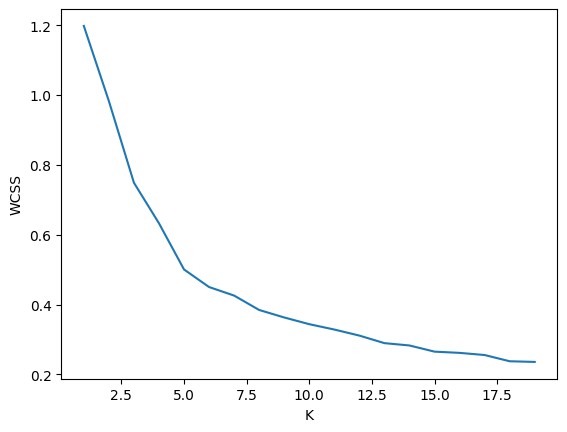

In [5]:
#pip install --upgrade scikit-learn numpy matplotlib
#pip uninstall scikit-learn
#pip install scikit-learn

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Scale the data
X = df.iloc[:, [3, 4]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []

for i in range(1, 20):
    centroids, distortion = kmeans(X_scaled, i)
    wcss.append(distortion)
    
plt.plot(range(1, 20), wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()



In [9]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state =10)
y_kmeans = kmeans.fit_predict(X)
X[y_kmeans==0]

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92],
       [39, 65]], dtype=int64)

In [10]:
X[y_kmeans==1]

array([[39, 61],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
       [46, 46],
       [46, 56],
       [46, 55],
       [47, 52],
       [47, 59],
       [48, 51],
       [48, 59],
       [48, 50],
       [48, 48],
       [48, 59],
       [48, 47],
       [49, 55],
       [49, 42],
       [50, 49],
       [50, 56],
       [54, 47],
       [54, 54],
       [54, 53],
       [54, 48],
       [54, 52],
       [54, 42],
       [54, 51],
       [54, 55],
       [54, 41],
       [54, 44],
       [54, 57],
       [54, 46],
       [57, 58],
       [57, 55],
       [58, 60],
       [58, 46],
       [59, 55],
       [59, 41],
       [60, 49],
       [60, 40],
       [60, 42],
       [60, 52],
       [60, 47],
       [60, 50],
       [61, 42],
       [61, 49],
       [62, 41],
       [62, 48],
       [62, 59],
       [62, 55

In [13]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


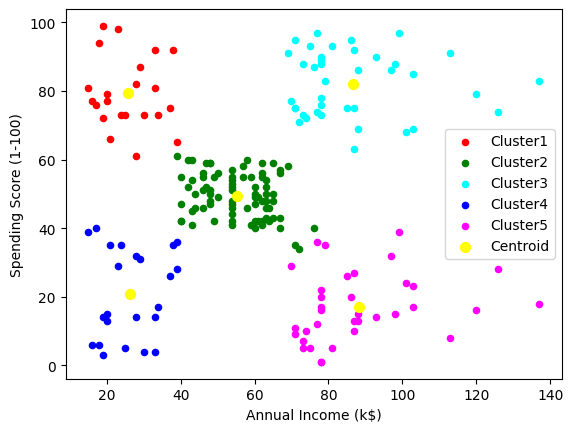

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init="k-means++", random_state =10)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20, c="red", label="Cluster1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20, c="green", label="Cluster2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20, c="cyan", label="Cluster3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20, c="blue", label="Cluster4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20, c="magenta", label="Cluster5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50, c="yellow", label="Centroid")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

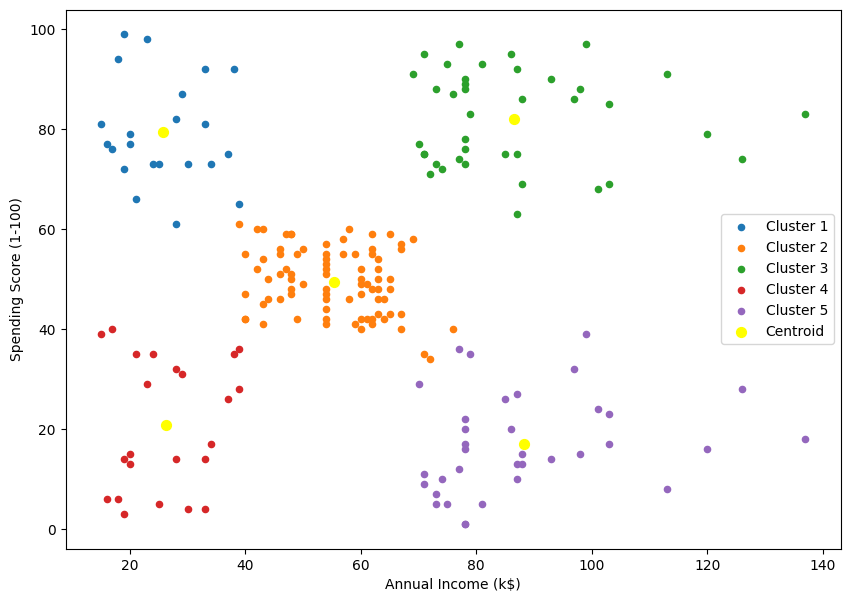

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Explicitly setting n_init to suppress the warning
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=10, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Scatter plot for clusters
plt.figure(figsize=(10, 7))

for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=20, label=f"Cluster {i + 1}")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c="yellow", label="Centroid")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Hierarchical Clustering

In [8]:
datasubset = df.loc[:,["Age", "Annual Income (k$)"]]

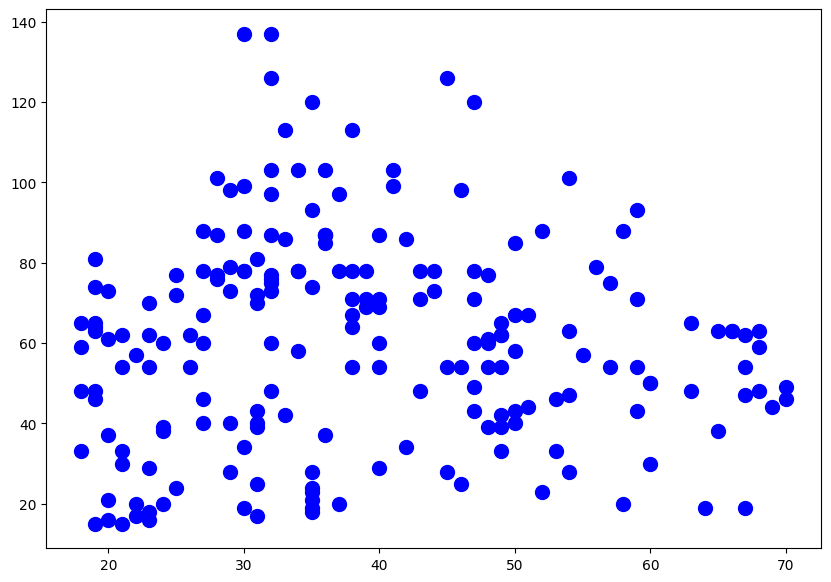

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(datasubset[["Age"]], datasubset[["Annual Income (k$)"]], s=100, c="blue")

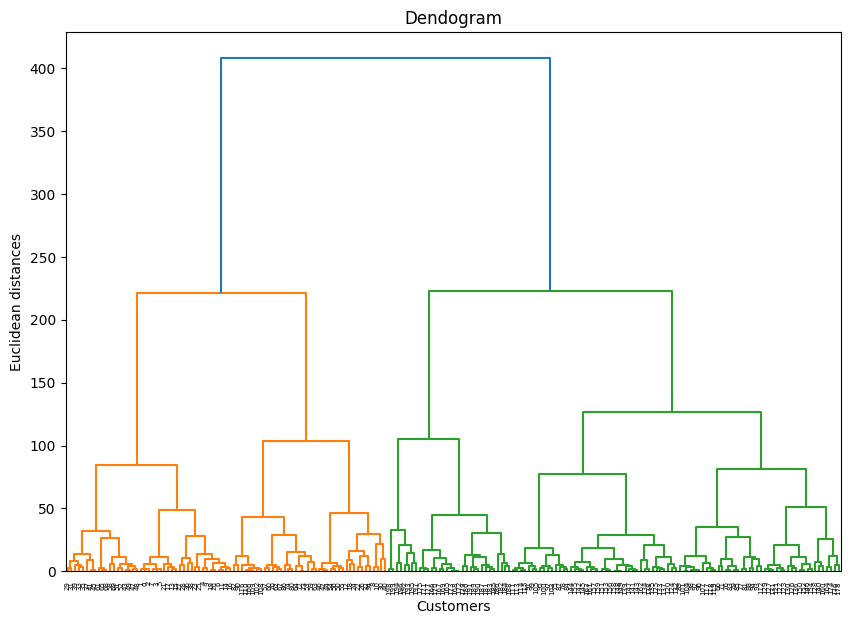

In [10]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))

dendogram = sch.dendrogram(sch.linkage(datasubset, method = "ward"))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
cluster.fit_predict(datasubset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [12]:
cl = cluster.fit_predict(datasubset)

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
silhouette_score(datasubset, cl)

0.4104652474372429

In [15]:
X = datasubset.values

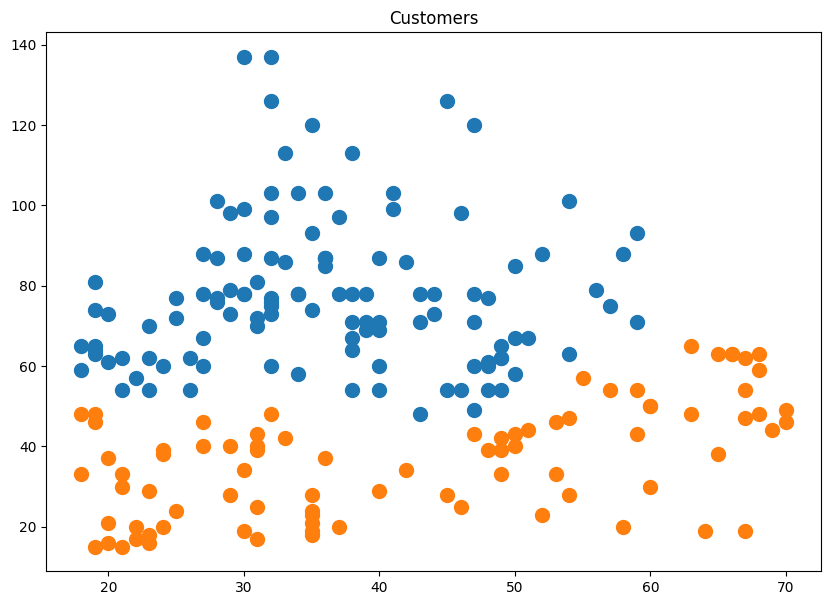

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0,0],X[cl==0,1], s=100, label = "Cluster 1")
plt.scatter(X[cl==1,0],X[cl==1,1], s=100, label = "Cluster 2")
plt.title("Customers")
plt.show()

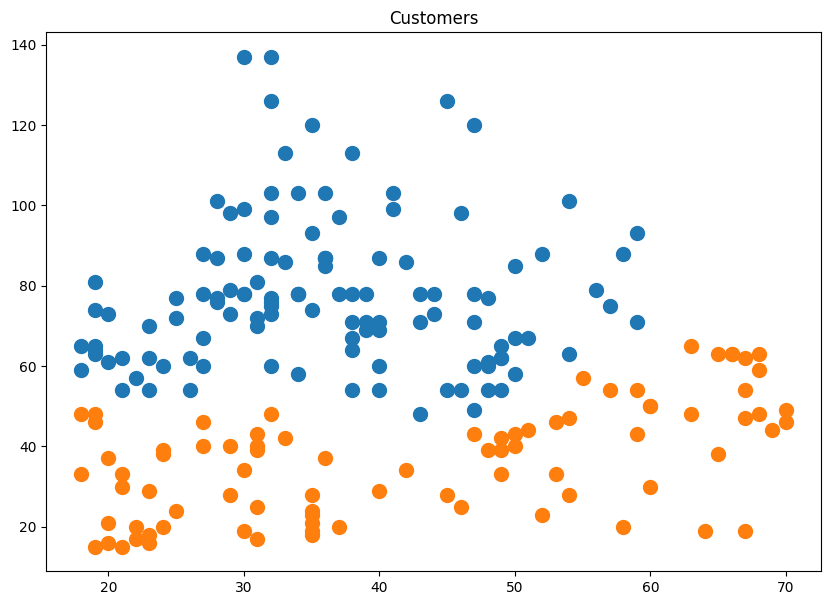

In [17]:
plt.figure(figsize=(10,7))
# Plotting points for each cluster
for i in range(2):# here 2 means 2 clusters
    plt.scatter(X[cl == i, 0], X[cl == i, 1], s=100, label=f"Cluster {i + 1}")
plt.title("Customers")
plt.show()
